## Breadth-first Search (BFS) 

---

This notebook implements a breadth-first search (BFS) algorithm to explore a maze from a given starting point, ensuring that the path found passes through all four corners of the maze. The algorithm iterates through the maze using a queue, expanding to neighboring cells until it reaches each corner. If a corner is encountered, it is removed from the list of remaining corners to visit. The function returns a list of segments, where each segment represents a path from the starting point to one of the corners. Finally, the `show_solution` function visualizes the maze and the complete path that passes through all four corners.

<br/>


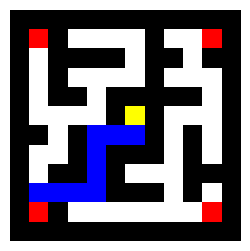

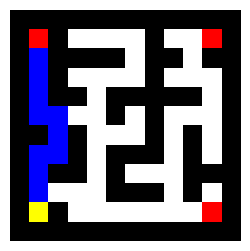

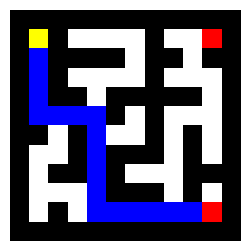

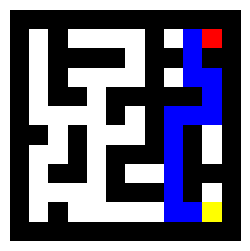

54

In [1]:
from maze_visualizer import *
from collections import deque


def bfs(maze, start):
    corners = [(1, 1), (1, len(maze[0]) - 2), (len(maze) - 2, 1), (len(maze) - 2, len(maze[0]) - 2)]
    
    # Record segments of complete path
    path_full = []
    
    # Define the four possible directions: up, down, left, right
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    while len(corners):    
        # Initialize a queue for BFS
        queue = deque([(start, [start])])

        # Initialize a set to keep track of visited cells
        visited = set()

        # Mark the start cell as visited
        visited.add(start)

        # Perform BFS
        while queue:
            current_cell, path = queue.popleft()

            if current_cell in corners:
                path_full.append(path)
                corners.remove(current_cell)
                start = current_cell
                break

            for direction in directions:
                new_cell = (current_cell[0] + direction[0], current_cell[1] + direction[1])
                if 0 <= new_cell[0] < len(maze) and 0 <= new_cell[1] < len(maze[0]) and maze[new_cell[0]][new_cell[1]] != 1 and new_cell not in visited:
                    queue.append((new_cell, path + [new_cell]))
                    visited.add(new_cell)
    
    
    return path_full



# Breadth-first search
start = (5, 6)
path = bfs(sample_maze, start)
show_solution(sample_maze, start, path)
count_steps(path)

---

### Alternative Implementation

Although BFS is still used here, I feel that this is not the best solution to the maze problem, as in this implementation, BFS is applied to ALL the possible corner visiting sequences and the best path is selected.

<br/>

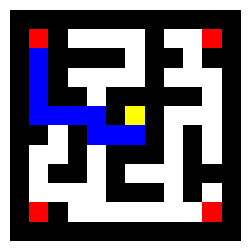

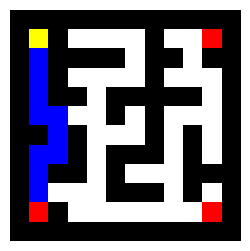

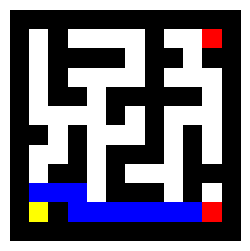

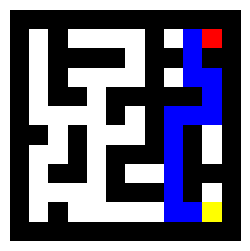

48

In [2]:
from math import inf


def bfs(maze, start, end):
    # Define the four possible directions: up, down, left, right
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    
    # Initialize a queue for BFS
    queue = deque([(start, [start])])
    
    # Initialize a set to keep track of visited cells
    visited = set()
    
    # Mark the start cell as visited
    visited.add(start)
    
    # Perform BFS
    while queue:
        current_cell, path = queue.popleft()
        if current_cell == end:
            return path
        
        for direction in directions:
            new_cell = (current_cell[0] + direction[0], current_cell[1] + direction[1])
            if 0 <= new_cell[0] < len(maze) and 0 <= new_cell[1] < len(maze[0]) and maze[new_cell[0]][new_cell[1]] != 1 and new_cell not in visited:
                queue.append((new_cell, path + [new_cell]))
                visited.add(new_cell)
    
    return None


def bfs_alt(maze, start):
    
    corners = [(1, 1), (1, len(maze[0]) - 2), (len(maze) - 2, 1), (len(maze) - 2, len(maze[0]) - 2)]
    
    # Generate all possible corner visiting sequences
    seq = list(permutations(corners))
    
    # Assume first path found is optimal
    min_path = []
    min_path.append(bfs(maze, start, seq[0][0]))
    for i in range(3):
        min_path.append(bfs(maze, seq[0][i], seq[0][i+1]))
    min_cost = sum([len(segment) for segment in min_path])
    
    # Find the path with minimum cost
    for i in range(1, len(seq)):
        path = []
        path.append(bfs(maze, start, seq[i][0]))
        for j in range(3):
            path.append(bfs(maze, seq[i][j], seq[i][j+1]))
        length = sum([len(segment) for segment in path])
        if length < min_cost:
            min_path = path
            min_cost = length
            
    return min_path


def permutations(nums):
    if len(nums) == 1:
        return [nums]
    
    result = []
    for i in range(len(nums)):
        current_num = nums[i]
        remaining_nums = nums[:i] + nums[i+1:]
        sub_permutations = permutations(remaining_nums)
        for perm in sub_permutations:
            result.append([current_num] + perm)
    
    return result


        
# Breadth-first search
start = (5, 6)
path = bfs_alt(sample_maze, start)
show_solution(sample_maze, start, path)
count_steps(path)